# Ejercicio K-Means con EDA

Sabemos que `K-Means` Clustering es un algoritmo de aprendizaje automático no supervisado. A diferencia de los algoritmos tradicionales de aprendizaje automático supervisado, K-Means intenta clasificar datos sin haber sido entrenado primero con datos etiquetados. Una vez que se ha ejecutado el algoritmo y se han definido los grupos, cualquier dato nuevo se puede asignar fácilmente al grupo más relevante.

Es muy importante tener en cuenta que en realidad **tenemos las etiquetas para este conjunto de datos**, pero **NO** las usaremos para el algoritmo de agrupamiento de `KMeans`, ya que es un algoritmo de aprendizaje no supervisado.

Cuando se utiliza el algoritmo Kmeans en circunstancias normales, es porque no tiene etiquetas. En este caso usaremos las etiquetas para tratar de tener una idea de qué tan bien se desempeñó el algoritmo, pero normalmente no se hará esto con `Kmeans`, por lo que el informe de clasificación y la matriz de confusión al final de este proyecto realmente no ¡Tiene sentido en un entorno del mundo real! es solo con propósitos de comparación

## Actividad

Se le brinda el dataset `./data/college_data.csv` con información de universidades tanto públicas como privadas. 
Realizar un análisis exploratorio de los datos, eliminar (de ser necesario) atributos que consideres, e implementar el algoritmo de K-Means para poder clasificar los grupos.

### Información del dataset

- private: factor que representa si una institución es privada o no
- apps: número de aplicaciones recibidas
- accept: número de aplicaciones aceptadas
- enroll: número de nuevos estudiantes
- top10perc: Pct de nuevos estudiantes que se encuentran en el top 10%
- top25perc: Pct de nuevos estudiantes que se encuentran en el top 25%
- f_undergrad: número de no graduados full-time
- p_undergrad: número de no graduados part-time 
- outstate: mátriculas fuera del estado
- room_board: costos de alojamiento y adicionales
- books: costo estimado de libros
- personal: costo estimado de gastos personales
- phd: Pct de miembros con Ph.D's
- terminal: Pct de facultad con grado finalizado
- s_f_ratio: ratio estudiante/miembros facultad
- perc_alumni: Pct el alumnado que ha realizado donaciones
- expend: gastos de instrucción por estudiante
- grad_rate: ratio de graduación

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')


from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carga de datos
# TODO 
data = pd.read_csv('data/college_data.csv')
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
pd.set_option('display.float', '{:.2f}'.format)
data.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.00,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


In [4]:
data.isna().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

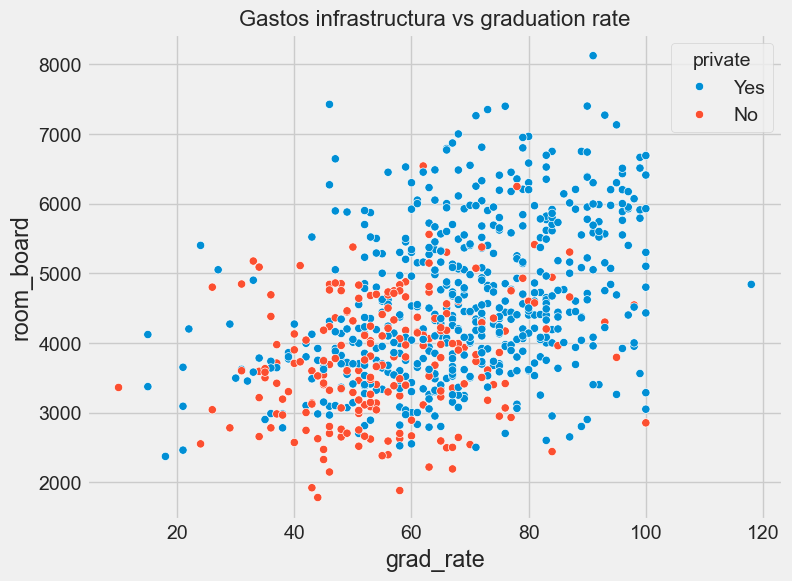

In [29]:
# Plot de gastos de infrastructura vs el graduation rate discriminando
# universidad publica de privada

# TODO 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title('Gastos infrastructura vs graduation rate', size=16)
# sns.scatterplot(x=data[data.private=='Yes']['grad_rate'].values, y=data[data.private=='Yes']['room_board'].values, ax=ax)
sns.scatterplot(data=data, x="grad_rate",y="room_board", hue="private", ax=ax);


In [23]:
data['gastos_estudiantes'] = data['room_board']+data['books']+data['personal']

In [24]:
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,gastos_estudiantes
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60,5950
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56,8700
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54,5315
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59,6775
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15,6420


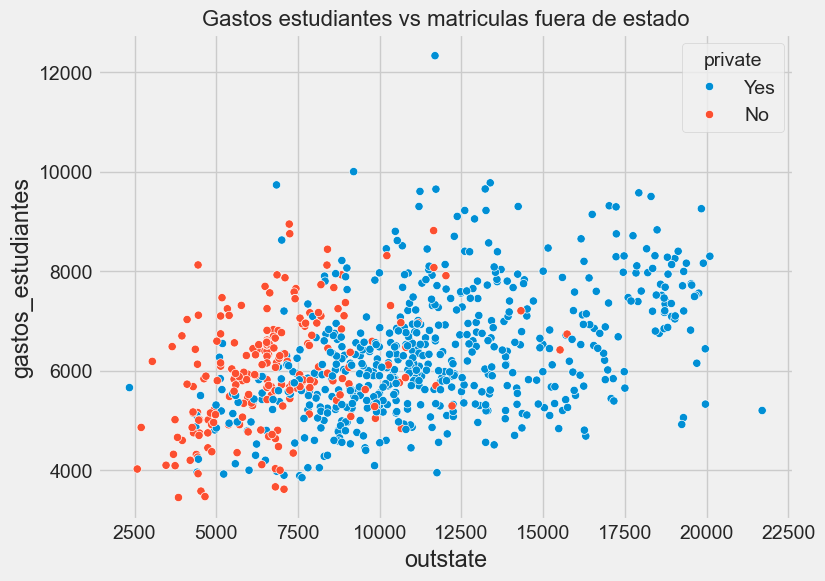

In [30]:
# Plot de gastos de no graduados vs matriculas fuera de estado discriminando
# universidad publica de privada

# TODO 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title('Gastos estudiantes vs matriculas fuera de estado', size=16)
sns.scatterplot(data=data, x="outstate",y="gastos_estudiantes", hue="private", ax=ax);

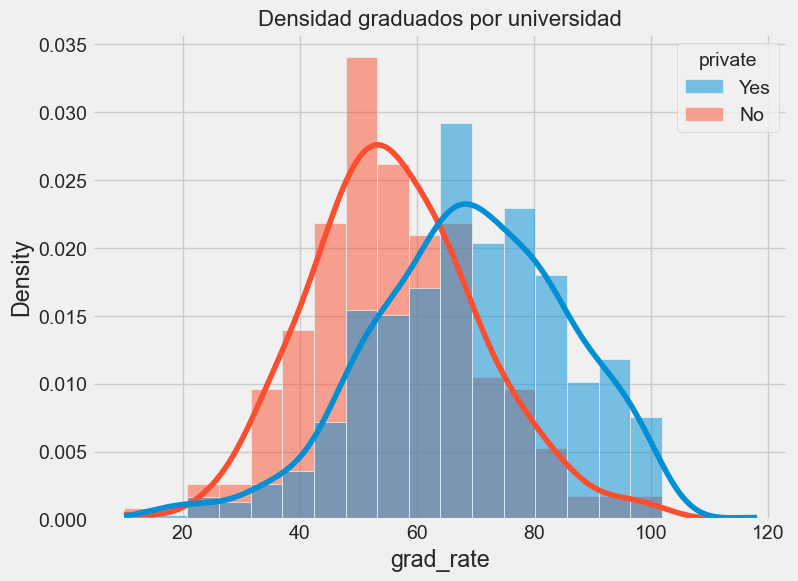

In [40]:
# Histograma de graduados vs universidad 
# publica y privada (Nota: Identificar posible error)

# TODO 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title('Densidad graduados por universidad', size=16)
sns.histplot(data=data, x='grad_rate', hue="private",stat='density', common_norm=False, kde=True, ax=ax);

In [57]:
# TODO Identificar Corregir error

#fila 95 columna 17 es donde se encuentra el valor atipico de grad_rate=118
data.iloc[95,17] = data[['grad_rate']].mean()

In [62]:
data[data.grad_rate==118]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,gastos_estudiantes


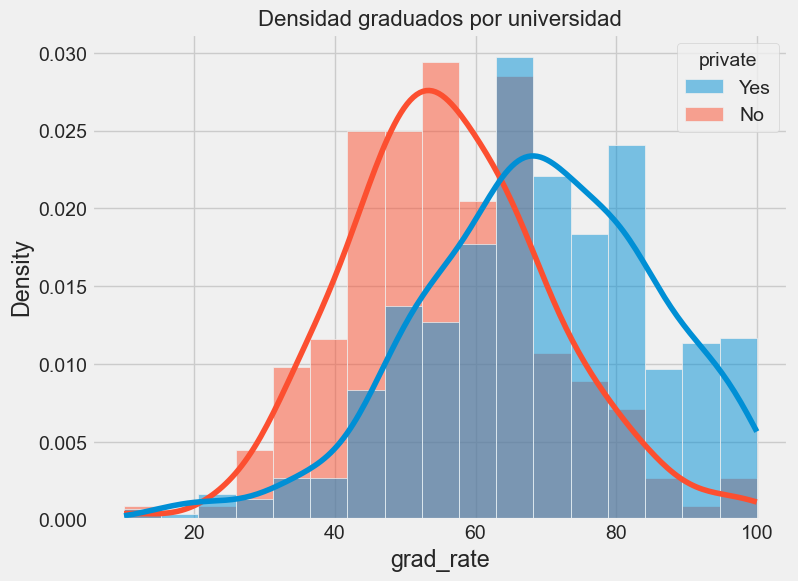

In [63]:
# Histograma de graduados vs universidad 
# publica y privada (Nota: con error corregido)

# TODO 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title('Densidad graduados por universidad', size=16)
sns.histplot(data=data, x='grad_rate', hue="private",stat='density', common_norm=False, kde=True, ax=ax);

## K-Means

In [ ]:
# Preparar datos para entrenar el modelo
# realizar drop del atributo que considere correspondiente de evaluar

# TODO 

In [ ]:
# Analizar cantidad de posibles clusters

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Implementar el modelo con sus hyper parámetros

# TODO 

In [ ]:
# Entrenar el modelo

# TODO 

In [ ]:
data['cluster'] = data.private.astype("category").cat.codes

In [ ]:
# Imprimir matriz de confusión y el reporte de clasificación

print(confusion_matrix(data.cluster, kmeans.labels_))
print(classification_report(data.cluster, kmeans.labels_))

In [ ]:
# Implementar StandardScales y entrenar el modelo nuevamente
# Imprimir matriz de confusión y el reporte de clasificación
# Comparar resultados

scalar = # TODO 

X = # TODO 
y = # TODO 

X = # TODO 

kmeans = # TODO 
kmeans.fit(X)

# print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))